<a href="https://colab.research.google.com/github/Anastasiya9323/machineLearning/blob/main/thirdAttempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [32]:
import torchvision.datasets

In [33]:
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

In [34]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

In [35]:
len(y_train), len(y_test)

(60000, 10000)

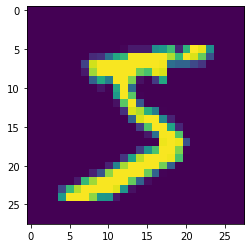

tensor(5)


In [36]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [37]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [38]:
X_train.shape

torch.Size([60000, 1, 28, 28])

In [39]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.act1  = torch.nn.ReLU()
        self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
       
        self.conv2 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act2  = torch.nn.ReLU()
        self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.fc1   = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3  = torch.nn.ReLU()
        
        self.fc2   = torch.nn.Linear(120, 84)
        self.act4  = torch.nn.ReLU()
        
        self.fc3   = torch.nn.Linear(84, 10)
    
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)
        
        return x
    
lenet5 = LeNet5()

In [40]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
lenet5 = lenet5.to(device)

In [41]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-3)

In [42]:
batch_size = 100

train_accuracy_history = []
train_loss_history = []

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)
best_accuraccy = 0

for epoch in range(400):
    order = np.random.permutation(len(X_train))
    train_preds = torch.zeros([X_train.shape[0], 10], dtype=torch.float)
    train_batch_loss_history = []
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = lenet5.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()

        train_batch_loss_history.append(loss_value.tolist())
        train_preds[batch_indexes] = preds.cpu()
        
        optimizer.step()
        
    train_loss_history.append(np.mean(train_batch_loss_history))
    
    accuracy_train = (train_preds.argmax(dim=1) == y_train).float().mean().cpu()
    train_accuracy_history.append(accuracy_train)
        
    test_preds = lenet5.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)
    
    print((epoch+1),": ",accuracy)
    if accuracy  > best_accuraccy:
        best_accuraccy = accuracy 
print(best_accuraccy)

1 :  tensor(0.9673)
2 :  tensor(0.9822)
3 :  tensor(0.9858)
4 :  tensor(0.9862)
5 :  tensor(0.9867)
6 :  tensor(0.9841)
7 :  tensor(0.9880)
8 :  tensor(0.9845)
9 :  tensor(0.9834)
10 :  tensor(0.9870)
11 :  tensor(0.9877)
12 :  tensor(0.9868)
13 :  tensor(0.9874)
14 :  tensor(0.9864)
15 :  tensor(0.9866)
16 :  tensor(0.9840)
17 :  tensor(0.9877)
18 :  tensor(0.9872)
19 :  tensor(0.9854)
20 :  tensor(0.9878)
21 :  tensor(0.9881)
22 :  tensor(0.9875)
23 :  tensor(0.9889)
24 :  tensor(0.9837)
25 :  tensor(0.9896)
26 :  tensor(0.9809)
27 :  tensor(0.9871)
28 :  tensor(0.9871)
29 :  tensor(0.9864)
30 :  tensor(0.9878)
31 :  tensor(0.9884)
32 :  tensor(0.9863)
33 :  tensor(0.9800)
34 :  tensor(0.9869)
35 :  tensor(0.9872)
36 :  tensor(0.9878)
37 :  tensor(0.9888)
38 :  tensor(0.9881)
39 :  tensor(0.9876)
40 :  tensor(0.9894)
41 :  tensor(0.9848)
42 :  tensor(0.9882)
43 :  tensor(0.9869)
44 :  tensor(0.9896)
45 :  tensor(0.9872)
46 :  tensor(0.9868)
47 :  tensor(0.9904)
48 :  tensor(0.9900)
4

In [43]:
lenet5.forward(X_test)

tensor([[-1566.2649,  -203.7667,  -359.5898,  ...,    85.1069,  -890.3440,
          -158.1777],
        [-3667.0938, -1877.6027,  -598.1856,  ..., -2126.3098, -2619.9795,
         -6711.2056],
        [-5230.7529,  -865.3330, -3310.8635,  ..., -3201.6440, -2748.9934,
         -4626.4819],
        ...,
        [-3863.2795,  -892.6573, -2203.7952,  ...,  -612.9270, -1596.3685,
          -102.5194],
        [-1810.1364, -3100.3672, -4525.7119,  ..., -3189.5854, -1088.9802,
         -1412.4899],
        [ -424.1953, -1307.9037, -1559.3519,  ..., -8917.1035,  -942.0618,
         -4892.3696]], device='cuda:0', grad_fn=<AddmmBackward0>)

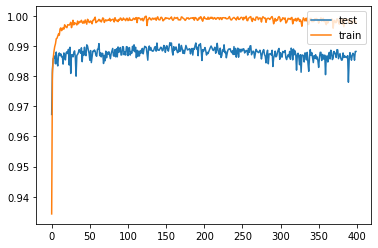

In [44]:
plt.plot(test_accuracy_history,label='test')
plt.plot(train_accuracy_history,label='train')
plt.legend(loc='upper right')

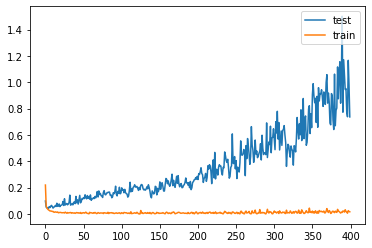

In [45]:
plt.plot(test_loss_history,label='test');
plt.plot(train_loss_history,label='train');
plt.legend(loc='upper right')